## SIR Example

In [1]:
%matplotlib inline
%config InlineBackend.figure_formats=['svg']
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (14, 4)

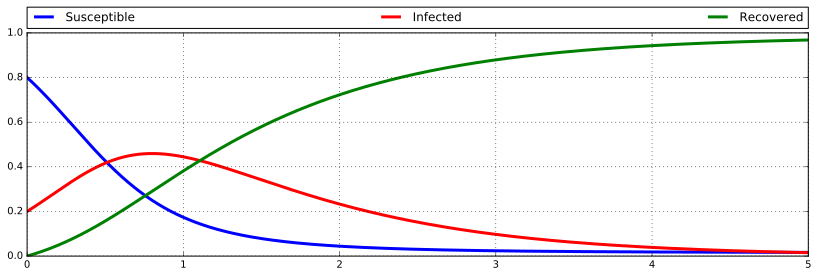

In [2]:
from SIR import *
sir = SIR(tstart=0.00, tend=5, dt=.001, beta=4, gamma=1, N=1)
sir.Initialize(S0=0.8, I0=0.2, R0=0);
sir.Simulate();
sir.PlotSIR(1)

## Prepare data

In [14]:
import random as rn
eps    = 0.01
noise  = eps*np.random.randn(3,sir._Time.shape[0])
dnoise = eps*np.random.randn(3,sir._Time.shape[0])

data  = np.transpose(np.insert(np.array([sir._SS , sir._II , sir._RR]) + noise,0,sir._Time,axis=0))
ddata = np.transpose(np.insert(np.array([sir._dSS, sir._dII, sir._dRR])+dnoise,0,sir._Time,axis=0))

filter:  None
method:  CentralDifference


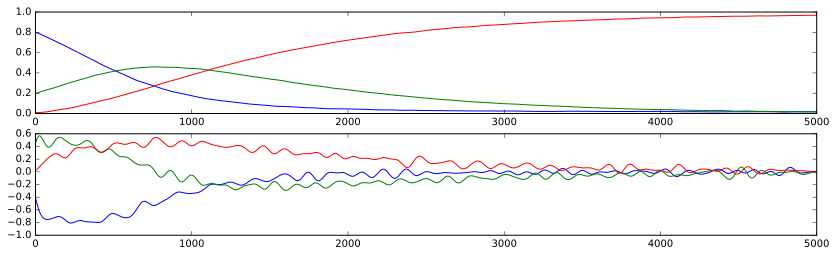

In [16]:
from Differentiate import *

D = Differentiate(data)
D.IIRFilter(order=5,cutoff=0.02)
plt.figure(2)
plt.subplot(2,1,1)
plt.plot(D._x)
plt.subplot(2,1,2)
plt.plot(D._dx)

## SINDy at work

Initiated a class for Sparse Identification from Numerical Dynamics
**** Derivative Set ****
**** Candidate functions library has been created ****
**** Performing regression. Please wait... ****
Iteration in progress:  1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 
**** Identification is complete. We now use it to simulate the system. ****


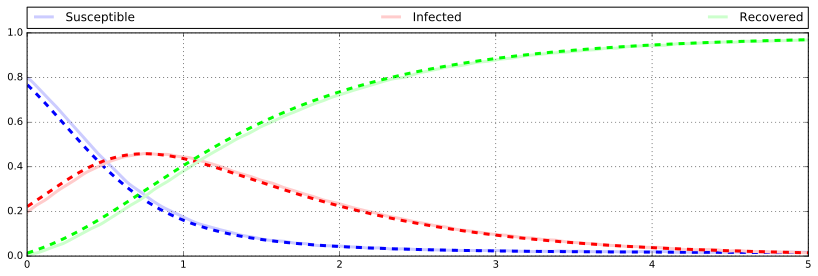

In [20]:
from SINDy import *
sin = SINDy(data=data,polyorder=2,usesine=False,cutoff=0.05)
sin.SetDerivative(ddata)
sin.RunSINDy(simulate=True)
sin.SINDyPlot(statesymbols=["Susceptible","Infected","Recovered"],
              datacolors=[[0.8, 0.8, 1.0],[1.0, 0.8, 0.8],[0.8, 1.0, 0.8]],
              simcolors =[[0.0, 0.0, 1.0],[1.0, 0.0, 0.0],[0.0, 1.0, 0.0]])

In [21]:
sin.StringModelView(StateVariables=["S","I","R"])

dS/dt = -130.29 +  259.18 S  +  259.62 I  +  260.64 R  + -128.91 S^2  + -262.17 I S  + -259.39 S R  + -129.30 I^2  + -259.66 I R  + -130.35 R^2 
dI/dt =  59.34 + -118.39 S  + -118.50 I  + -119.20 R  +  59.03 S^2  +  121.31 I S  +  118.57 S R  +  58.21 I^2  +  118.06 I R  +  59.87 R^2 
dR/dt =  4.69 + -8.44 S  + -8.75 I  + -8.72 R  +  3.82 S^2  +  8.60 I S  +  8.49 S R  +  4.96 I^2  +  9.04 I R  +  4.02 R^2 
